<a href="https://colab.research.google.com/github/Exco35/Exco35/blob/main/COP1000_Module11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 11**

# **Practice Exercise 10**
**Managing Data; Acquiring and Wrangling Data**

https://towardsdatascience.com/13-ways-to-access-data-in-python-bac5683e0063

## **Video 1**

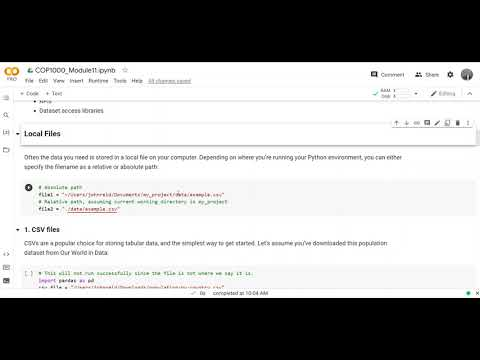

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('c_NOAgT-o18', width=800, height=300)

## **Data Acquisition**

In recent years, python programming has been one of the primary tools utilized for data analysis. Without data, the scope of what can be done with programming becomes very limited. In this module, we will discuss dta sources and then what we may need to do to the data to effectively use it in our programs. Since we are using python, the tools used will be specifically python packages and libraries, but the concepts can be applied to other programming languages as well.

In previous modules, we discussed different ways to store volumes of data so we can navigate or manipulate it. Think back to the List, dict, tuple, and set classes that we have used. If we are going to import a volume of data into our program, we are not limited to those, we can use a DataFrame which is a class from the Pandas library. In the next module we will dicuss performance and potential issues associated with dataframes, but for now, it will be a great tool for us to store data of various types in.

we may need to install pandas and this is te command line method of installing.

! pip install pandas

pip is a tool that we can use to install libraries to our system

There are four commonly used sources for data
* Local files
* Databases
* APIs
* Dataset access libraries




### **Local Files**

Often the data you need is stored in a local file on your computer. Depending on where you’re running your Python environment, you can either specify the filename as a relative or absolute path:

In [ ]:
# Absolute path
file1 = "~/Users/johnreid/Documents/my_project/data/example.csv"
# Relative path, assuming current working directory is my_project
file2 = "./data/example.csv"

#### **1. CSV files**
CSVs are a popular choice for storing tabular data, and the simplest way to get started. Let’s assume you’ve downloaded this population dataset from Our World in Data:

In [ ]:
# This will not run successfully since the file is not where we say it is.
import pandas as pd
csv_file = "/Users/johnreid/Downloads/population-by-country.csv"
df_from_csv = pd.read_csv(csv_file)
df_from_csv.info()

After importing the data, it’s helpful to run Credit_df.info() to understand how your data is structured e.g. how many rows, columns and non-null values you have. Running that code gives us the following output:

In [ ]:
# not local but similar conceptually

url= "https://drive.google.com/file/d/1UqAoosxMF5MxhlvAfgxtOhteFiQGpMpe/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

Credit_df = pd.read_csv(url)
Credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 31.4+ KB


This method also works for files accessible by URLs, like a public Google Sheet or CSV file in a public Github repo. Also, if you keep getting aFileNotFoundError then try renaming your filename to replace spaces with underscores e.g. "Financial Sample.xlsx" becomes "Financial_Sample.xlsx".

In [ ]:
# Create your own code to perform the same connectivity but to a file of your choice.



#### **2. Excel files**
You need to be a bit more cautious with Excel files, because they may contain more than one sheet of data and complex visual formatting e.g. extra header rows. Otherwise the syntax is pretty similar — here’s a financial data example:

In [ ]:
# Keep in mind the file is not available locally
import pandas as pd
excel_file = "/Users/johnreid/Downloads/Financial_Sample.xlsx"
df_from_excel = pd.read_excel(excel_file, sheet_name = "Sheet1")
df_from_excel.info()

#### **3. Text files**
Text files often need more data processing — start by looking at how the data is stored and how you’d like to represent it in Python. From there, you can write code to transform textual input into a dataframe. Let’s use a shopping list example, with each line containing an item and a quantity:

#### **4. Multiple files / folders**
What happens if you need to extract data from multiple stored files? Let’s combine a couple of things that we’ve learned to extract data from the BBC Sport text dataset.

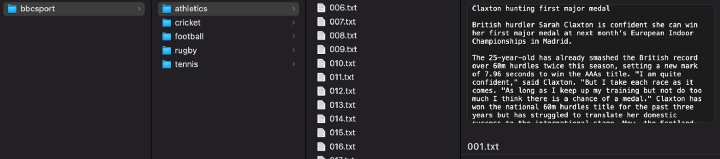


We have 5 subfolders, each with around 100 files. Each file starts with a headline, followed by the body of the article. Our goal will be to combine all these files into a single dataframe with ‘Title’, ‘Subtitle’, ‘Body’ and ‘Genre’ columns. The glob library comes really in handy here to list all possible filenames:

import glob

import pandas as pd

base_path = "/Users/johnreid/Downloads/bbcsport/"

genres = ["athletics", "cricket", "football", "rugby", "tennis"]

def read_and_split_file(filename):

    with open(filename, 'r', encoding="latin-1") as f:
        lines = f.readlines() # Get lines as a list of strings
        lines = list(map(str.strip, lines)) # Remove /n characters
        lines = list(filter(None, lines)) # Remove empty strings
    return lines

def get_df_from_genre(path, genre):

    files = glob.glob(path + genre + "/*.txt")

    titles = []

    subtitles = []

    bodies = []

    for f in files:

        lines = read_and_split_file(f)

        titles.append(lines[0]) # First line is the title

        subtitles.append(lines[1]) # Second line is the subtitle

        bodies.append(' '.join(lines[2:])) # Combine all the rest

    return(pd.DataFrame({

        'genre': genre,

        'title': titles,

        'subtitle': subtitles,

        'body': bodies

        })

    )

final_df = pd.concat([get_df_from_genre(base_path, g) for g in genres])

final_df

### **Databases**

Most organizations store their business-critical data in a relational database like Postgres or MySQL, and you’ll need to know Structured Query Language (SQL) to access or update the data stored there. Databases have a number of advantages, like data normalization.

#### **5. SQLite**
SQLite is an embedded database that is stored as a single file, so it’s a great place to start testing out queries. Here we’ll show an example of connecting to a SQLite file of the Chinook database:

In [ ]:
import pandas as pd
import sqlite3 as sql
conn = sql.connect('/Users/johnreid/Downloads/chinook.db')
# First pattern - turn query directly into dataframe:
df1 = pd.read_sql_query("SELECT * FROM invoice", conn)
# Second pattern - get row-level data, but no column names
cur = conn.cursor()
results = cur.execute("SELECT * FROM invoice LIMIT 5").fetchall()
df2 = pd.DataFrame(results)

#### **6. Remote databases**
Connecting to a remote database like Postgres, Redshift, or SQLServer uses mostly the same syntax but requires access credentials. For security reasons, it’s best to store these credentials in a config file and load them into your Python script. You can create a separate .py file with the following info:

host = "localhost"
database= "suppliers"
user = "postgres"
password = "SecurePas$1"
and then import it into your Python script as follows (you’ll also need the psychopg2 library):

import psycopg2
import config
conn = psycopg2.connect(
    host=config.host,
    database=config.database,
    user=config.user,
    password=config.password)
df1 = pd.read_sql_query("SELECT * FROM invoice", conn)
Make sure to keep your config.py file safe and don't upload it elsewhere - you can add it to your .gitignore to make sure it doesn't get included in git commits.

#### **7. SQLAlchemy**
If you want a more ‘pythonic’ way of querying a database, try the SQLAlchemy library, which is an Object-Relational-Mapper. It’s typically used for applications so that developers don’t have to write pure SQL to update their database, but you can use it for querying data too!

Here’s an example using the same Chinook music store database:

In [ ]:
import sqlalchemy as db
engine = db.create_engine('sqlite:///chinook.db')
connection = engine.connect()
metadata = db.MetaData()
invoice = db.Table('invoice', metadata, autoload=True, autoload_with=engine)
# Get the first 10 invoices from the USA
query = (db.select([invoice])
    .filter_by(billing_country = 'USA')
    .limit(10)
        )
df = pd.read_sql(query, engine)

In this code we connect to the database, then set up some tables & metadata in SQLAlchemy. Once that’s defined, we can write a query in a more ‘pythonic’ way and read the results directly to a Pandas dataframe.

### **APIs**

Sometimes you’ll need to access data from a particular platform your company uses, like Hubspot, Twitter or Trello. These platforms often have a public API that you can pull data from, directly inside your Python environment.

The basic idea is you send a request (which may include query parameters and access credentials) to an endpoint. That endpoint will return a response code plus the data you asked for (hopefully). You’ll need to look at the API documentation to understand what data fields are available. The data will usually be returned in JSON format, which allows for deeply-nested data.

#### **8. Without credentials**
Let’s do a minimal example using the OpenNotify API, which tracks all the people currently in space:

In [ ]:
import requests
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)
print(response.json())
res = pd.DataFrame(response.json()["people"])
res.head()

200
{'message': 'success', 'people': [{'name': 'Cai Xuzhe', 'craft': 'Tiangong'}, {'name': 'Chen Dong', 'craft': 'Tiangong'}, {'name': 'Liu Yang', 'craft': 'Tiangong'}, {'name': 'Sergey Prokopyev', 'craft': 'ISS'}, {'name': 'Dmitry Petelin', 'craft': 'ISS'}, {'name': 'Frank Rubio', 'craft': 'ISS'}, {'name': 'Nicole Mann', 'craft': 'ISS'}, {'name': 'Josh Cassada', 'craft': 'ISS'}, {'name': 'Koichi Wakata', 'craft': 'ISS'}, {'name': 'Anna Kikina', 'craft': 'ISS'}], 'number': 10}


,name,craft
0,Cai Xuzhe,Tiangong
1,Chen Dong,Tiangong
2,Liu Yang,Tiangong
3,Sergey Prokopyev,ISS
4,Dmitry Petelin,ISS


The response code tells you the result of your API call — according to Dataquest the most common are:

200: Everything went okay, and the result has been returned (if any).
301: The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
400: The server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
403: The resource you’re trying to access is forbidden: you don’t have the right permissions to see it.
404: The resource you tried to access wasn’t found on the server.
503: The server is not ready to handle the request.

We will dig deeper into this in the last video for this module.

#### **9. With credentials & query parameters**

Sometimes you may need more specific information from the API, or have to authenticate. There are several ways to do this, however one of the most common is adding URL parameters to your request.

Let’s assume we have a config.pyfile with our API key in it:

personal_api_key = "wouldntyouliketoknow"

Then we create a dictionary for all the parameters (this is a made-up example) and pass it in:

import config

import pandas as pd

import requests

parameters = {
    "personal_api_key": config.personal_api_key,
    "date": "2021-09-22"
}
response = requests.get(url, params = parameters)
    
print(response.status_code)

print(response.json())
    
res = pd.DataFrame(response.json()["people"])

res.head()

If you don’t want to deal with JSON you can try searching for a Python library for that API — these are usually open-source and maintained by the company or third parties.

### **Dataset access libraries**

What if you need some reference data for a comparison or adding context? There are a bunch of libraries for downloading public datasets straight into your environment — think of it as pulling from APIs without having to manage all the extra complexity.

#### **10. Pandas_datareader**
Pandas_datareader is a great way to pull data from the internet into your Python environment. It is particularly suited to financial data, but also has some World Bank datasources. To get Zoom’s daily share price over the past few years, try the following:

In [ ]:
from pandas_datareader import data
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import datetime as dt
zm = data.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-08-17').reset_index()
zm.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519277
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586556
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726293
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859334
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838937


In [ ]:
zm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674 entries, 0 to 2673
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2674 non-null   datetime64[ns]
 1   High       2674 non-null   float64       
 2   Low        2674 non-null   float64       
 3   Open       2674 non-null   float64       
 4   Close      2674 non-null   float64       
 5   Volume     2674 non-null   float64       
 6   Adj Close  2674 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 146.4 KB


#### **11. DataCommons**
Datacommons is a project by Google providing access to standardized and cleaned public datasets. The underlying data is represented in a graph format, making it really easy to query and join data from many different datasources e.g. the US Census, World Bank, Wikipedia, Centre for Disease Control and more. Here’s a basic example:

In [ ]:
!pip install datacommons datacommons_pandas --upgrade --quiet
import datacommons_pandas as dc
import pandas as pd
city_dcids = dc.get_property_values(["CDC500_City"], "member", limit=500)["CDC500_City"]
cdc500_df = dc.build_multivariate_dataframe(
    city_dcids,
    ["Percent_Person_Obesity",  # Prevalence of obesity from CDC
    "Median_Income_Person",
    "Median_Age_Person",
    "UnemploymentRate_Person",  # Unemployment rate from BLS
    "Count_Person_BelowPovertyLevelInThePast12Months",  # Persons living below the poverty line from Census
    "Count_Person",  # Total population from Census
    ],
)
cdc500_df.info()

     |████████████████████████████████| 46 kB 2.1 MB/s 
     |████████████████████████████████| 45 kB 2.0 MB/s 
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, geoId/0107000 to geoId/5613900
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Count_Person_BelowPovertyLevelInThePast12Months  500 non-null    int64  
 1   Count_Person                                     500 non-null    int64  
 2   Percent_Person_Obesity                           500 non-null    float64
 3   Median_Income_Person                             500 non-null    int64  
 4   Median_Age_Person                                500 non-null    float64
 5   UnemploymentRate_Person                          495 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 27.3+ KB


#### **12. PyTrends (Google Trends)**
PyTrends is an unofficial but useful library for querying Google Trends data — here’s a simple example:

In [ ]:

! pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=e7938579d32f7820238c07d6819c9b1c14678327e059a9b1a9d4677af2516b7f
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [ ]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq()
keywords = ["oat milk", "soy milk", "almond milk"]
pytrends.build_payload(keywords, cat=0, geo='', gprop='') # Get data from the last 5 years
top_queries = pytrends.interest_over_time()[keywords]
top_queries.head()

,oat milk,soy milk,almond milk
date,,,
2017-11-19,4,20,54
2017-11-26,4,21,56
2017-12-03,4,21,55
2017-12-10,4,18,51
2017-12-17,4,19,49


#### **13. Kaggle**
Kaggle is a data science community that hosts a lot of datasets and competitions for learning Python. You can download some of these datasets to play around with through their command-line interface (note: you’ll need to sign up for a Kaggle account). For example, say we want to download some Zillow economics data, we can run the following commands in our terminal (Jupyter users: replace the $ with ! in your Python code:

In [ ]:
import json
import os
from pathlib import Path


In [ ]:
# for this to work on Colab, we would need to perform some tasks using our google drive and the kaggle site
#  https://medium.com/unpackai/how-to-use-kaggle-datasets-in-google-colab-f9b2e4b5767c
#! pip install kaggle
! pip install kaggle --upgrade
! export KAGGLE_USERNAME=datadinosaur
! export KAGGLE_KEY=xxxxxxxxxxxxxx
! kaggle datasets download zillow/zecon
! kaggle datasets download zillow/zecon -f State_time_series.csv

This will download a zipped file of the datasets, and then uncompress them. From there, you can open them as local files with Pandas.

## **Video 2**

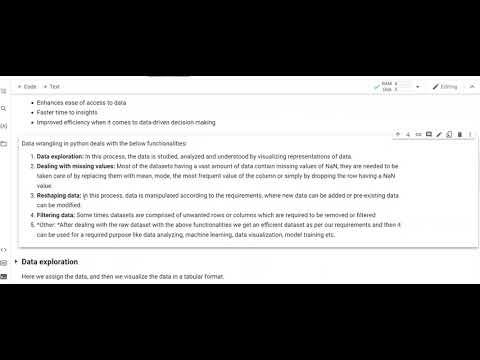

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('4lg1RbfwpF8', width=800, height=300)

## **Data Wrangling**

**What is Data Wrangling?**

Data wrangling, also referred to as data munging, is the process of converting and mapping data from one raw format into another. The purpose of this is to prepare the data in a way that makes it accessible for effective use further down the line. Not all data is created equal, therefore it’s important to organize and transform your data in a way that can be easily accessed by others.

While an activity such as data wrangling might sound like a job for someone in the Wild West, it’s an integral part of the classic data pipeline and ensuring data is prepared for future use. A data wrangler is a person responsible for performing the process of wrangling.

**Benefits of Data Wrangling**
Although data wrangling is an essential part of preparing your data for use, the process yields many benefits. Benefits include:

* Enhances ease of access to data
* Faster time to insights
* Improved efficiency when it comes to data-driven decision making

Data wrangling in python deals with the below functionalities:

1. **Data exploration:** In this process, the data is studied, analyzed and understood by visualizing representations of data.
2. **Dealing with missing values:** Most of the datasets having a vast amount of data contain missing values of NaN, they are needed to be taken care of by replacing them with mean, mode, the most frequent value of the column or simply by dropping the row having a NaN value.
3. **Reshaping data:** In this process, data is manipulated according to the requirements, where new data can be added or pre-existing data can be modified.
4. **Filtering data:** Some times datasets are comprised of unwanted rows or columns which are required to be removed or filtered
5. **Other: **After dealing with the raw dataset with the above functionalities we get an efficient dataset as per our requirements and then it can be used for a required purpose like data analyzing, machine learning, data visualization, model training etc.

### **Data exploration**
Here we assign the data, and then we visualize the data in a tabular format.

In [ ]:
# Import pandas package
import pandas as pd

# Assign data
data = {'Name': ['Jai', 'Princi', 'Gaurav',
                 'Anuj', 'Ravi', 'Natasha', 'Riya'],
        'Age': [17, 17, 18, 17, 18, 17, 17],
        'Gender': ['M', 'F', 'M', 'M', 'M', 'F', 'F'],
        'Marks': [90, 76, 'NaN', 74, 65, 'NaN', 71]}

# Convert into DataFrame
df = pd.DataFrame(data)

# Display data
df

,Name,Age,Gender,Marks
0,Jai,17,M,90
1,Princi,17,F,76
2,Gaurav,18,M,NaN
3,Anuj,17,M,74
4,Ravi,18,M,65
5,Natasha,17,F,NaN
6,Riya,17,F,71


In [ ]:
df.head(5)

,Name,Gender,Marks
0,Jai,0.0,90.0
1,Princi,1.0,76.0
2,Gaurav,0.0,75.2
5,Natasha,1.0,75.2


### **Dealing with missing values**
As we can see from the previous output, there are NaN values present in the MARKS column which are going to be taken care of by replacing them with the column mean.

In [ ]:
# Compute average
c = avg = 0
for ele in df['Marks']:
    if str(ele).isnumeric():
        c += 1
        avg += ele
avg /= c

# Replace missing values
df = df.replace(to_replace="NaN",
                value=avg)

# Display data
df

,Name,Age,Gender,Marks
0,Jai,17,M,90.0
1,Princi,17,F,76.0
2,Gaurav,18,M,75.2
3,Anuj,17,M,74.0
4,Ravi,18,M,65.0
5,Natasha,17,F,75.2
6,Riya,17,F,71.0


### **Reshaping data**
In the GENDER column, we can reshape the data by categorizing them into different numbers.

In [ ]:

# Categorize gender
df['Gender'] = df['Gender'].map({'M': 0,
                                 'F': 1, }).astype(float)

# Display data
df

,Name,Age,Gender,Marks
0,Jai,17,0.0,90.0
1,Princi,17,1.0,76.0
2,Gaurav,18,0.0,75.2
3,Anuj,17,0.0,74.0
4,Ravi,18,0.0,65.0
5,Natasha,17,1.0,75.2
6,Riya,17,1.0,71.0


### **Filtering data**
Suppose there is a requirement for the details regarding name, gender, marks of the top-scoring students. Here we need to remove some unwanted data.

In [ ]:
# Filter top scoring students
df = df[df['Marks'] >= 75]

# Remove age row
df = df.drop(['Age'], axis=1)

# Display data
df

,Name,Gender,Marks
0,Jai,0.0,90.0
1,Princi,1.0,76.0
2,Gaurav,0.0,75.2
5,Natasha,1.0,75.2


Your Turn:

Lets use a built in dataset that is included in seaborn library, its data about the titanic.

See https://www.kaggle.com/c/titanic/data for codebook and additional information.

Use one of the options when it comes to missing data for the deck column... If deck is an important bit of info you may want to keep the column and change the NAN to something else.  [(a good read)](https://medium.com/@limavallantin/machine-learning-with-the-titanic-disaster-f8c80084c868)

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Your turn, what can you do to address the NaN's

## **Video 3**

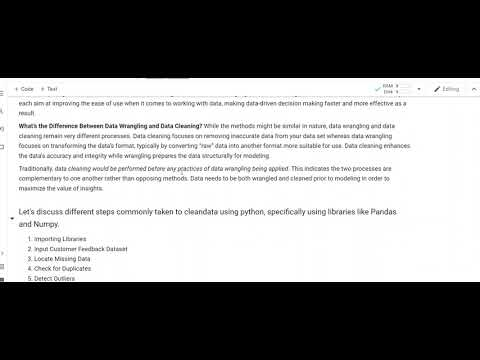

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('jOFF7bZj8Y0', width=800, height=300)

## **Data Cleaning**

What is Data Cleaning?
Data cleaning, also referred to as data cleansing, is the process of finding and correcting inaccurate data from a particular data set or data source. The primary goal is to identify and remove inconsistencies without deleting the necessary data to produce insights. It’s important to remove these inconsistencies in order to increase the validity of the data set.

Cleaning encompasses a multitude of activities such as identifying duplicate records, filling empty fields and fixing structural errors. These tasks are crucial for ensuring the quality of data is accurate, complete, and consistent. Cleaning assists in fewer errors and complications further downstream. For a deeper dive into the best practices and techniques for performing these tasks, look to our Ultimate Guide to Cleaning Data.

Benefits of Data Cleaning
There is a wide range of benefits that come with cleaning data that can lead to increased operational efficiency. Properly cleansing your data before use leads to benefits such as:

* Elimination of errors
* Reduced costs associated with errors
* Improves the integrity of data
* Ensures the highest quality of information for decision making

When comparing the benefits of each, it’s clear that the goals behind data wrangling and data cleaning are consistent with one another. They each aim at improving the ease of use when it comes to working with data, making data-driven decision making faster and more effective as a result.

**What’s the Difference Between Data Wrangling and Data Cleaning?**
While the methods might be similar in nature, data wrangling and data cleaning remain very different processes. Data cleaning focuses on removing inaccurate data from your data set whereas data wrangling focuses on transforming the data’s format, typically by converting “raw” data into another format more suitable for use. Data cleaning enhances the data’s accuracy and integrity while wrangling prepares the data structurally for modeling.

Traditionally, *data cleaning would be performed before any practices of data wrangling being applied*. This indicates the two processes are complementary to one another rather than opposing methods. Data needs to be both wrangled and cleaned prior to modeling in order to maximize the value of insights.

### Let's discuss different steps commonly taken to cleandata using python, specifically using libraries like Pandas and Numpy.

1. Importing Libraries
2. Input Customer Feedback Dataset
3. Locate Missing Data
4. Check for Duplicates
5. Detect Outliers
6. Normalize Casing

#### **1. Importing Libraries**

Let’s get Pandas and NumPy up and running

In [ ]:
import pandas as pd
import numpy as np

#### **2. Input the Dataset that will be used**

Next, we ask our libraries to read a feedback dataset. Let’s see what that looks like

In [ ]:
url= "https://drive.google.com/file/d/1UqAoosxMF5MxhlvAfgxtOhteFiQGpMpe/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

Credit_df = pd.read_csv(url)

Credit_df.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331
5,80.180,8047,569,4,77,10,Male,No,No,1151
6,20.996,3388,259,2,37,12,Female,No,No,203
7,71.408,7114,512,2,87,9,Male,No,No,872
8,15.125,3300,266,5,66,13,Female,No,No,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,1350


#### **3. Locate Missing Data**

In [ ]:
Credit_df.isnull()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False


In [ ]:
Credit_df.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Balance      0
dtype: int64

From here, we use code to actually clean the data. This boils down to two basic options. 1) Drop the data or, 2) Input missing data. If you opt to:

**1. Drop the data**

You’ll have to make another decision – whether to drop only the missing values and keep the data in the set, or to eliminate the feature (the entire column) wholesale because there are so many missing datapoints that it isn’t fit for analysis.

If you want to drop the missing values you’ll have to go in and mark them void according to Pandas or NumPy standards (see section below). But if you want to drop the entire column, here’s the code:

In [ ]:
remove = ['Age','Gender']
Credit_df.drop(remove, inplace =True, axis =1)

In [ ]:
Credit_df.head(10)

,Income,Limit,Rating,Cards,Education,Student,Married,Balance
0,14.891,3606,283,2,11,No,Yes,333
1,106.025,6645,483,3,15,Yes,Yes,903
2,104.593,7075,514,4,11,No,No,580
3,148.924,9504,681,3,11,No,No,964
4,55.882,4897,357,2,16,No,Yes,331
5,80.180,8047,569,4,10,No,No,1151
6,20.996,3388,259,2,12,No,No,203
7,71.408,7114,512,2,9,No,No,872
8,15.125,3300,266,5,13,No,No,279
9,71.061,6819,491,3,19,Yes,Yes,1350


In [ ]:
# Your turn, drop a row, or drop a column, or both

**2. Input missing data**

Technically, the method described above of filling in individual values with Pandas or NumBy standards is also a form of inputting missing data – we call it adding ‘No Review’. When it comes to inputting missing data you can either add ‘No Review’ using the code below, or manually fill in the correct data.

In [ ]:
Credit_df['Cards'] = Credit_df['Cards'].fillna('No Cards')  # if column is gone, for example 'Gender' then the statement will throw an error.

#### **4. Check for Duplicates**

Duplicates, like missing data, cause problems and clog up analytics software. Let’s locate and eliminate them.

To locate duplicates we start out with:

In [ ]:
Credit_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

If there were duplicates we could remove them using the following code:

In [ ]:
Credit_df.drop_duplicates()

,Income,Limit,Rating,Cards,Education,Student,Married,Balance
0,14.891,3606,283,2,11,No,Yes,333
1,106.025,6645,483,3,15,Yes,Yes,903
2,104.593,7075,514,4,11,No,No,580
3,148.924,9504,681,3,11,No,No,964
4,55.882,4897,357,2,16,No,Yes,331
...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,13,No,Yes,560
396,13.364,3838,296,5,17,No,No,480
397,57.872,4171,321,5,12,No,Yes,138
398,37.728,2525,192,1,13,No,Yes,0


#### **5. Detect Outliers**

Outliers are numerical values that lie significantly outside of the statistical norm. Cutting that down from unnecessary science garble – they are data points that are so out of range they are likely misreads.

They, like duplicates, need to be removed. Let’s sniff out an outlier by first, pulling up our dataset.

In [ ]:
Credit_df['Cards'].describe()

count    400.000000
mean       2.957500
std        1.371275
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: Cards, dtype: float64

Take a look at that ‘max’ value - none of the other values are even close to 9, with the mean (the average) being 2.9575. Now, your solution to outliers will depend on your knowledge of your dataset. In this case, the data scientists who input the knowledge know that they meant to put a value of lets say 6 not 9. So, we can safely remove the outlier to fix our data.

In [ ]:
Credit_df.sort_values(by=['Cards'], ascending=False)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
205,10.793,3878,321,8,29,13,Male,No,No,638
193,130.209,10088,730,7,39,19,Female,No,Yes,1426
344,48.218,5199,401,7,39,10,Male,No,Yes,633
293,140.672,11200,817,7,46,9,Male,No,Yes,1677
56,57.100,4742,372,7,79,18,Female,No,Yes,379
...,...,...,...,...,...,...,...,...,...,...
303,44.061,4970,352,1,79,11,Male,No,Yes,414
363,64.173,6127,433,1,80,10,Male,No,Yes,578
72,22.939,4923,355,1,47,18,Female,No,Yes,663
302,59.855,4964,365,1,46,13,Female,No,Yes,295


In [ ]:

Credit_df.loc[383,'Cards'] = 6 # This is assuming I identified the index of the data outlier as 383 and replaced the value with 6
Credit_df.head(20)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331
5,80.180,8047,569,4,77,10,Male,No,No,1151
6,20.996,3388,259,2,37,12,Female,No,No,203
7,71.408,7114,512,2,87,9,Male,No,No,872
8,15.125,3300,266,5,66,13,Female,No,No,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,1350


### **6. Normalize Casing**

Last but not least we are going to dot our i’s and cross our t’s. Meaning we are going to standardize (lowercase) all review titles so as not to confuse our algorithms, and we are going to capitalize Customer Names, so that our algorithms know they are variables (you’ll see this in action below).

Here’s how to make every review title lowercase:

In [ ]:
  Credit_df['Gender'] = Credit_df['Gender'].str.lower()
  Credit_df.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,male,No,Yes,333
1,106.025,6645,483,3,82,15,female,Yes,Yes,903
2,104.593,7075,514,4,71,11,male,No,No,580
3,148.924,9504,681,3,36,11,female,No,No,964
4,55.882,4897,357,2,68,16,male,No,Yes,331


In [ ]:
Credit_df['Gender'] = Credit_df['Gender'].str.title()
Credit_df.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331


## **Video 4**

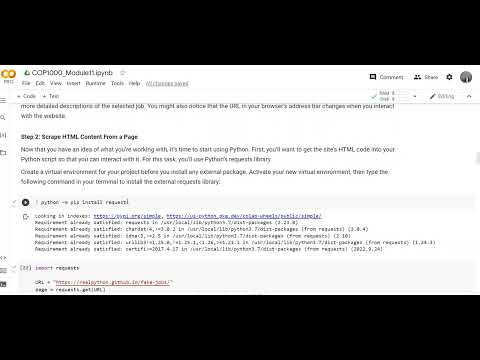

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('StTSFeRvzFc', width=800, height=300)

## **Web Scraping**

In [ ]:
# https://realpython.com/beautiful-soup-web-scraper-python/

**What Is Web Scraping?**

Web scraping is the process of gathering information from the Internet. Even copying and pasting the lyrics of your favorite song is a form of web scraping! However, the words “web scraping” usually refer to a process that involves automation. Some websites don’t like it when automatic scrapers gather their data, while others don’t mind.

If you’re scraping a page respectfully for educational purposes, then you’re unlikely to have any problems. Still, it’s a good idea to do some research on your own and make sure that you’re not violating any Terms of Service before you start a large-scale project.

**Reasons for Web Scraping**

Say you’re a surfer, both online and in real life, and you’re looking for employment. However, you’re not looking for just any job. With a surfer’s mindset, you’re waiting for the perfect opportunity to roll your way!

There’s a job site that offers precisely the kinds of jobs you want. Unfortunately, a new position only pops up once in a blue moon, and the site doesn’t provide an email notification service. You think about checking up on it every day, but that doesn’t sound like the most fun and productive way to spend your time.

Thankfully, the world offers other ways to apply that surfer’s mindset! Instead of looking at the job site every day, you can use Python to help automate your job search’s repetitive parts. Automated web scraping can be a solution to speed up the data collection process. You write your code once, and it will get the information you want many times and from many pages.

In contrast, when you try to get the information you want manually, you might spend a lot of time clicking, scrolling, and searching, especially if you need large amounts of data from websites that are regularly updated with new content. Manual web scraping can take a lot of time and repetition.

There’s so much information on the Web, and new information is constantly added. You’ll probably be interested in at least some of that data, and much of it is just out there for the taking. Whether you’re actually on the job hunt or you want to download all the lyrics of your favorite artist, automated web scraping can help you accomplish your goals.

**Challenges of Web Scraping**

The Web has grown organically out of many sources. It combines many different technologies, styles, and personalities, and it continues to grow to this day. In other words, the Web is a hot mess! Because of this, you’ll run into some challenges when scraping the Web:

Variety: Every website is different. While you’ll encounter general structures that repeat themselves, each website is unique and will need personal treatment if you want to extract the relevant information.

Durability: Websites constantly change. Say you’ve built a shiny new web scraper that automatically cherry-picks what you want from your resource of interest. The first time you run your script, it works flawlessly. But when you run the same script only a short while later, you run into a discouraging and lengthy stack of tracebacks!

Unstable scripts are a realistic scenario, as many websites are in active development. Once the site’s structure has changed, your scraper might not be able to navigate the sitemap correctly or find the relevant information. The good news is that many changes to websites are small and incremental, so you’ll likely be able to update your scraper with only minimal adjustments.

However, keep in mind that because the Internet is dynamic, the scrapers you’ll build will probably require constant maintenance. You can set up continuous integration to run scraping tests periodically to ensure that your main script doesn’t break without your knowledge.

**An Alternative to Web Scraping: APIs**

Some website providers offer application programming interfaces (APIs) that allow you to access their data in a predefined manner. With APIs, you can avoid parsing HTML. Instead, you can access the data directly using formats like JSON and XML. HTML is primarily a way to present content to users visually.

When you use an API, the process is generally more stable than gathering the data through web scraping. That’s because developers create APIs to be consumed by programs rather than by human eyes.

The front-end presentation of a site might change often, but such a change in the website’s design doesn’t affect its API structure. The structure of an API is usually more permanent, which means it’s a more reliable source of the site’s data.

However, APIs can change as well. The challenges of both variety and durability apply to APIs just as they do to websites. Additionally, it’s much harder to inspect the structure of an API by yourself if the provided documentation lacks quality.

The approach and tools you need to gather information using APIs are outside the scope of this tutorial. To learn more about it, check out API Integration in Python.

**Scrape the Fake Python Job Site**

In this tutorial, you’ll build a web scraper that fetches Python software developer job listings from the Fake Python Jobs site. It’s an example site with fake job postings that you can freely scrape to train your skills. Your web scraper will parse the HTML on the site to pick out the relevant information and filter that content for specific words.

You can scrape any site on the Internet that you can look at, but the difficulty of doing so depends on the site. This tutorial offers you an introduction to web scraping to help you understand the overall process. Then, you can apply this same process for every website you’ll want to scrape.

Throughout the tutorial, you’ll also encounter a few exercise blocks. You can click to expand them and challenge yourself by completing the tasks described there.

**Step 1: Inspect Your Data Source**

Before you write any Python code, you need to get to know the website that you want to scrape. That should be your first step for any web scraping project you want to tackle. You’ll need to understand the site structure to extract the information that’s relevant for you. Start by opening the site you want to scrape with your favorite browser.

Explore the Website
Click through the [site and interact with it](https://realpython.github.io/fake-jobs/) just like any typical job searcher would. For example, you can scroll through the main page of the website:

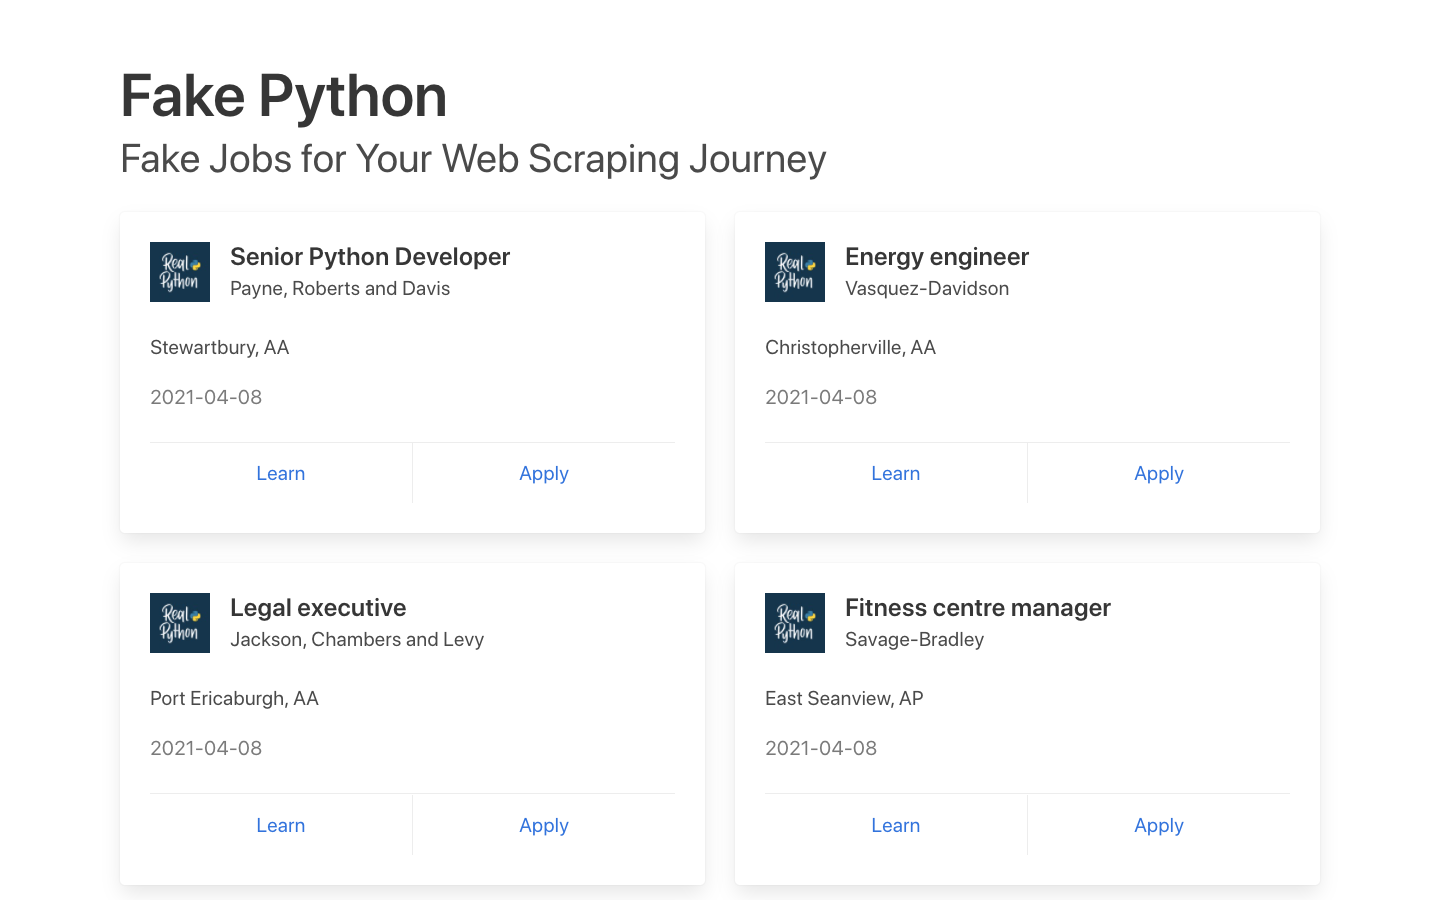

You can see many job postings in a card format, and each of them has two buttons. If you click Apply, then you’ll see a new page that contains more detailed descriptions of the selected job. You might also notice that the URL in your browser’s address bar changes when you interact with the website.

**Step 2: Scrape HTML Content From a Page**

Now that you have an idea of what you’re working with, it’s time to start using Python. First, you’ll want to get the site’s HTML code into your Python script so that you can interact with it. For this task, you’ll use Python’s requests library.

Create a virtual environment for your project before you install any external package. Activate your new virtual environment, then type the following command in your terminal to install the external requests library:

In [ ]:
! python -m pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

print(page.text)

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Fake Python</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">
  </head>
  <body>
  <section class="section">
    <div class="container mb-5">
      <h1 class="title is-1">
        Fake Python
      </h1>
      <p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
    </div>
    <div class="container">
    <div id="ResultsContainer" class="columns is-multiline">
    <div class="column is-half">
<div class="card">
  <div class="card-content">
    <div class="media">
      <div class="media-left">
        <figure class="image is-48x48">
          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">
        </figure>
      </div>
      <div class="media-content">
        <h2 class="title is-

**Your turn:**

explore [alternatives](https://stackshare.io/beautifulsoup/alternatives) to Beautiful Soup

**Step 3: Parse HTML Code With Beautiful Soup**

You’ve successfully scraped some HTML from the Internet, but when you look at it, it just seems like a huge mess. There are tons of HTML elements here and there, thousands of attributes scattered around—and wasn’t there some JavaScript mixed in as well? It’s time to parse this lengthy code response with the help of Python to make it more accessible and pick out the data you want.

Beautiful Soup is a Python library for parsing structured data. It allows you to interact with HTML in a similar way to how you interact with a web page using developer tools. The library exposes a couple of intuitive functions you can use to explore the HTML you received. To get started, use your terminal to install Beautiful Soup:

In [ ]:
! python -m pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

Find Elements by ID
In an HTML web page, every element can have an id attribute assigned. As the name already suggests, that id attribute makes the element uniquely identifiable on the page. You can begin to parse your page by selecting a specific element by its ID.

Switch back to developer tools and identify the HTML object that contains all the job postings. Explore by hovering over parts of the page and using right-click to Inspect.

Note: It helps to periodically switch back to your browser and interactively explore the page using developer tools. This helps you learn how to find the exact elements you’re looking for.

The element you’re looking for is a <div> with an id attribute that has the value "ResultsContainer". It has some other attributes as well, but below is the gist of what you’re looking for:

In [ ]:
results = soup.find(id="ResultsContainer")
print(results.prettify())

<div class="columns is-multiline" id="ResultsContainer">
 <div class="column is-half">
  <div class="card">
   <div class="card-content">
    <div class="media">
     <div class="media-left">
      <figure class="image is-48x48">
       <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
      </figure>
     </div>
     <div class="media-content">
      <h2 class="title is-5">
       Senior Python Developer
      </h2>
      <h3 class="subtitle is-6 company">
       Payne, Roberts and Davis
      </h3>
     </div>
    </div>
    <div class="content">
     <p class="location">
      Stewartbury, AA
     </p>
     <p class="is-small has-text-grey">
      <time datetime="2021-04-08">
       2021-04-08
      </time>
     </p>
    </div>
    <footer class="card-footer">
     <a class="card-footer-item" href="https://www.realpython.com" target="_blank">
      Learn
     </a>
     <a class="card-footer-item" href=

**Find Elements by HTML Class Name**

You’ve seen that every job posting is wrapped in a <div> element with the class card-content. Now you can work with your new object called results and select only the job postings in it. These are, after all, the parts of the HTML that you’re interested in! You can do this in one line of code:

In [ ]:
job_elements = results.find_all("div", class_="card-content")
for job_element in job_elements:
    print(job_element, end="\n"*2)

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://fi

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element)
    print(company_element)
    print(location_element)
    print()

<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
<p class="location">
        Stewartbury, AA
      </p>

<h2 class="title is-5">Energy engineer</h2>
<h3 class="subtitle is-6 company">Vasquez-Davidson</h3>
<p class="location">
        Christopherville, AA
      </p>

<h2 class="title is-5">Legal executive</h2>
<h3 class="subtitle is-6 company">Jackson, Chambers and Levy</h3>
<p class="location">
        Port Ericaburgh, AA
      </p>

<h2 class="title is-5">Fitness centre manager</h2>
<h3 class="subtitle is-6 company">Savage-Bradley</h3>
<p class="location">
        East Seanview, AP
      </p>

<h2 class="title is-5">Product manager</h2>
<h3 class="subtitle is-6 company">Ramirez Inc</h3>
<p class="location">
        North Jamieview, AP
      </p>

<h2 class="title is-5">Medical technical officer</h2>
<h3 class="subtitle is-6 company">Rogers-Yates</h3>
<p class="location">
        Davidville, AP
      </p>

<h2 class="t

**Extract Text From HTML Elements**

You only want to see the title, company, and location of each job posting. And behold! Beautiful Soup has got you covered. You can add .text to a Beautiful Soup object to return only the text content of the HTML elements that the object contains:

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text)
    print(company_element.text)
    print(location_element.text)
    print()

Senior Python Developer
Payne, Roberts and Davis

        Stewartbury, AA
      

Energy engineer
Vasquez-Davidson

        Christopherville, AA
      

Legal executive
Jackson, Chambers and Levy

        Port Ericaburgh, AA
      

Fitness centre manager
Savage-Bradley

        East Seanview, AP
      

Product manager
Ramirez Inc

        North Jamieview, AP
      

Medical technical officer
Rogers-Yates

        Davidville, AP
      

Physiological scientist
Kramer-Klein

        South Christopher, AE
      

Textile designer
Meyers-Johnson

        Port Jonathan, AE
      

Television floor manager
Hughes-Williams

        Osbornetown, AE
      

Waste management officer
Jones, Williams and Villa

        Scotttown, AP
      

Software Engineer (Python)
Garcia PLC

        Ericberg, AE
      

Interpreter
Gregory and Sons

        Ramireztown, AE
      

Architect
Clark, Garcia and Sosa

        Figueroaview, AA
      

Meteorologist
Bush PLC

        Kelseystad, AA
      

Audiolo

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA

Energy engineer
Vasquez-Davidson
Christopherville, AA

Legal executive
Jackson, Chambers and Levy
Port Ericaburgh, AA

Fitness centre manager
Savage-Bradley
East Seanview, AP

Product manager
Ramirez Inc
North Jamieview, AP

Medical technical officer
Rogers-Yates
Davidville, AP

Physiological scientist
Kramer-Klein
South Christopher, AE

Textile designer
Meyers-Johnson
Port Jonathan, AE

Television floor manager
Hughes-Williams
Osbornetown, AE

Waste management officer
Jones, Williams and Villa
Scotttown, AP

Software Engineer (Python)
Garcia PLC
Ericberg, AE

Interpreter
Gregory and Sons
Ramireztown, AE

Architect
Clark, Garcia and Sosa
Figueroaview, AA

Meteorologist
Bush PLC
Kelseystad, AA

Audiological scientist
Salazar-Meyers
Williamsburgh, AE

English as a second language teacher
Parker, Murphy and Brooks
Mitchellburgh, AE

Surgeon
Cruz-Brown
West Jessicabury, AA

Equities trader
Macdonald-Ferguson
Maloneshire, AE


**Find Elements by Class Name and Text Content**

Not all of the job listings are developer jobs. Instead of printing out all the jobs listed on the website, you’ll first filter them using keywords.

You know that job titles in the page are kept within elements. To filter for only specific jobs, you can use the string argument:

In [ ]:
python_jobs = results.find_all("h2", string="Python")

In [ ]:
print(python_jobs)

[]


In [ ]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

In [ ]:
print(len(python_jobs))

10


In [ ]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

python_job_elements = [
    h2_element.parent.parent.parent for h2_element in python_jobs
]

In [ ]:
for job_element in python_job_elements:
    # -- snip --
    links = job_element.find_all("a")
    for link in links:
        link_url = link["href"]
        print(f"Apply here: {link_url}\n")

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/python-developer-50.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github